# Liver Disease Classification

In [4]:
# importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Summary Statisitics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [7]:
#checking for null values 
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
df =df.rename(columns = {'Dataset':'label'})

## Exploratory Analysis

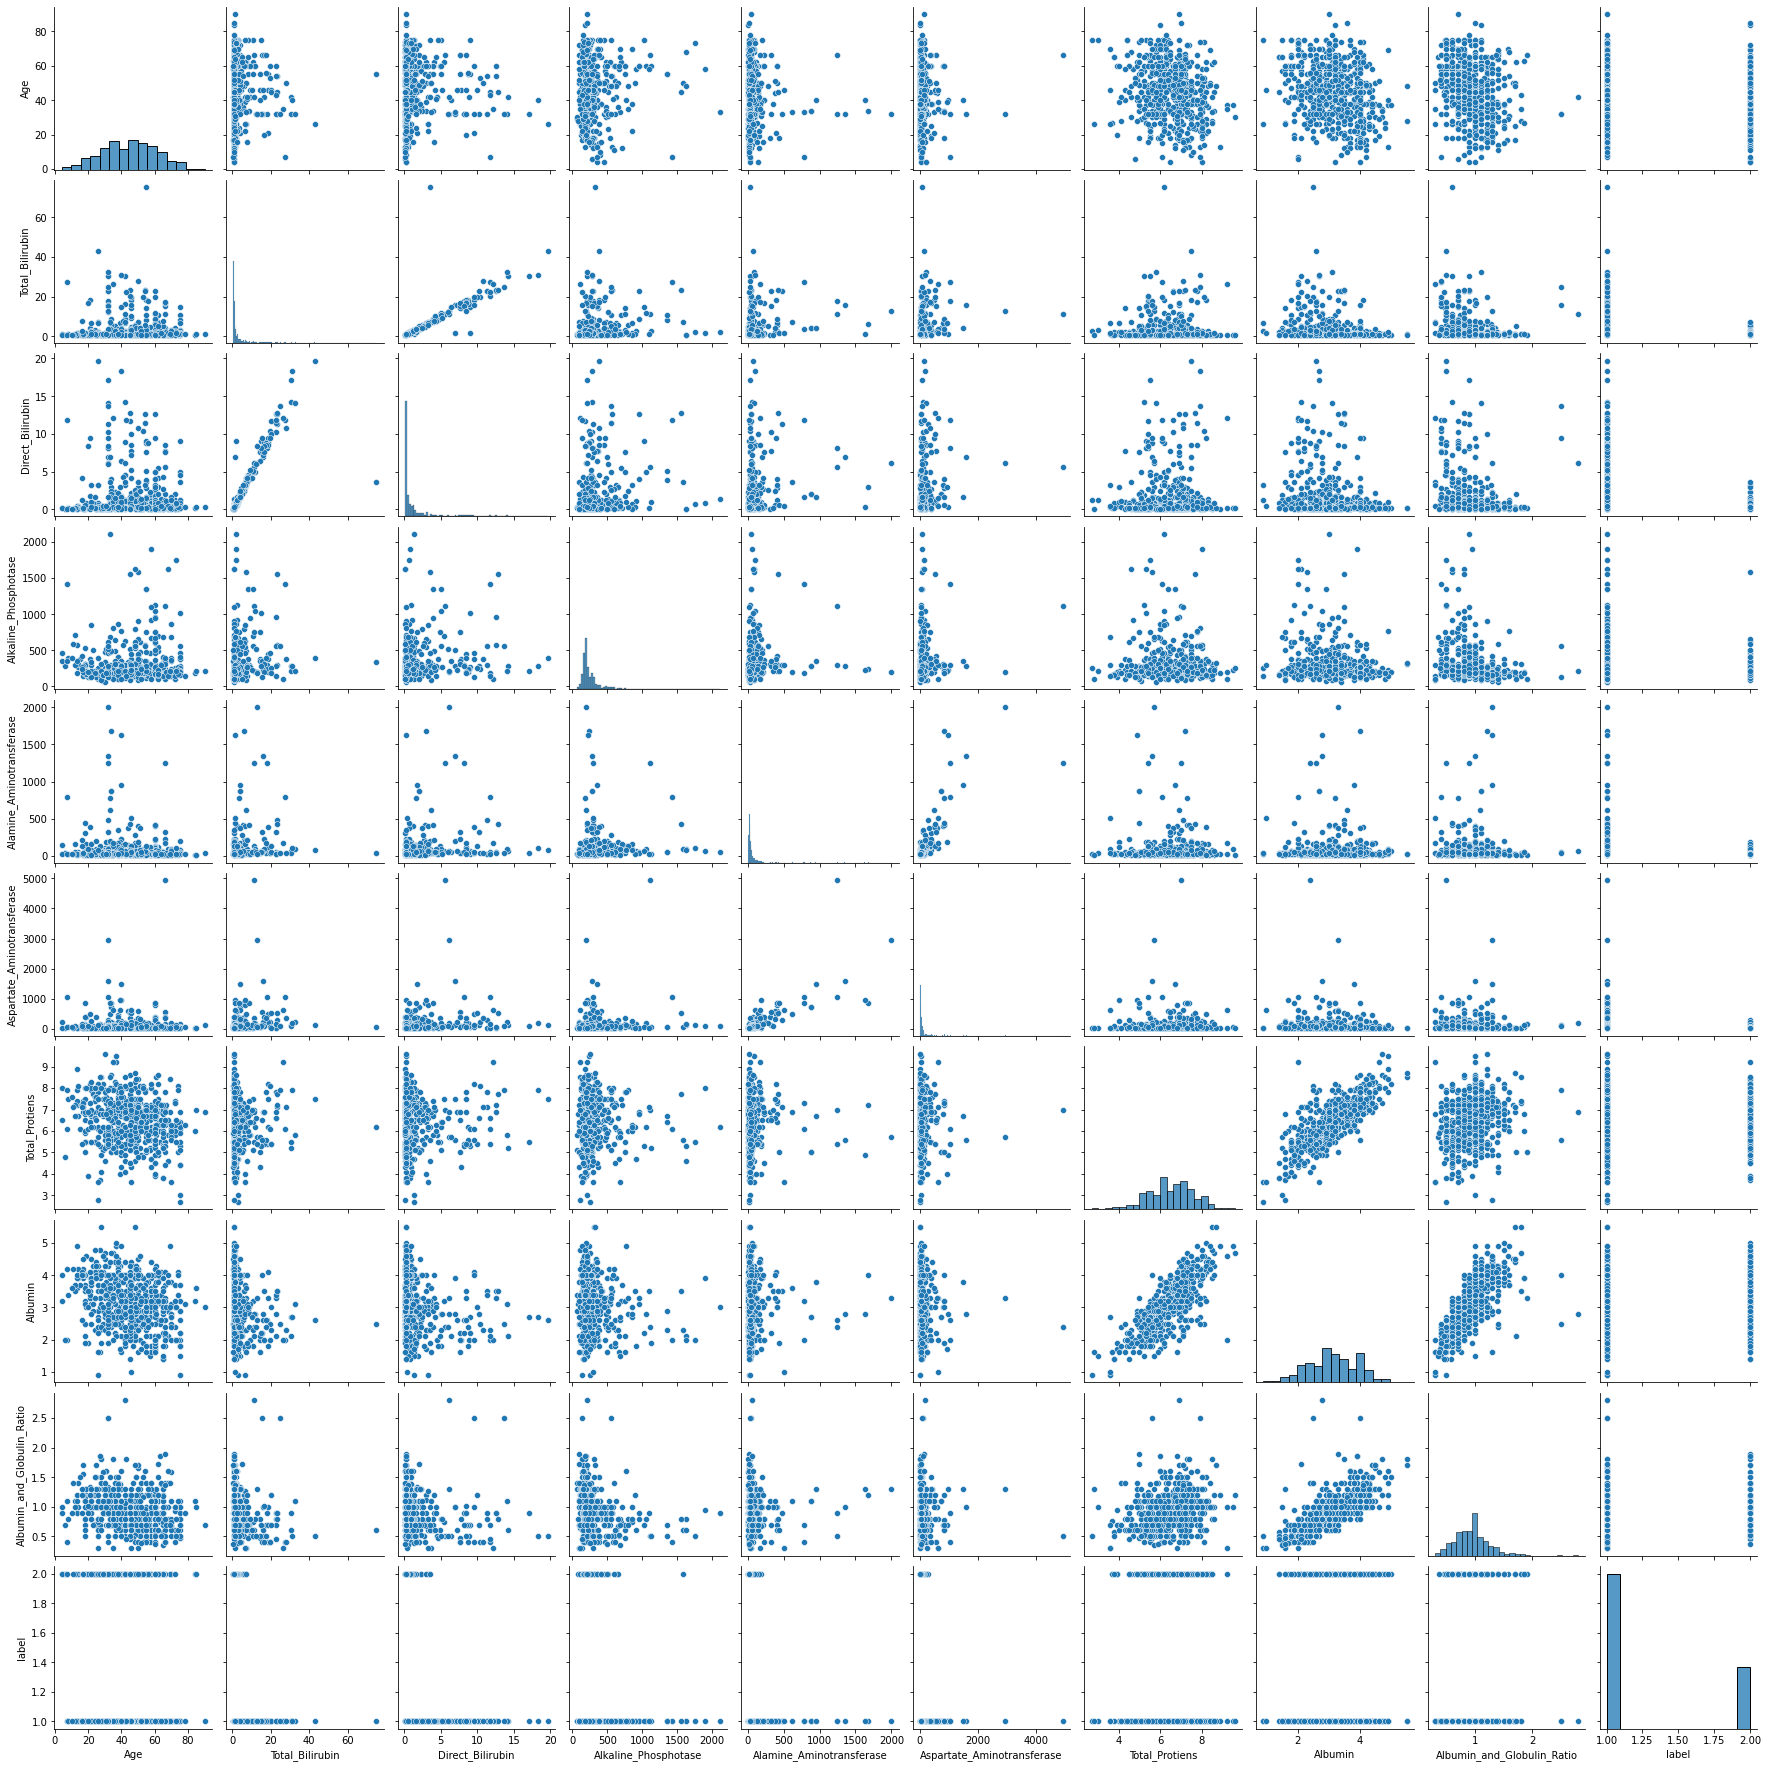

In [9]:
sns.pairplot(df)

<AxesSubplot:>

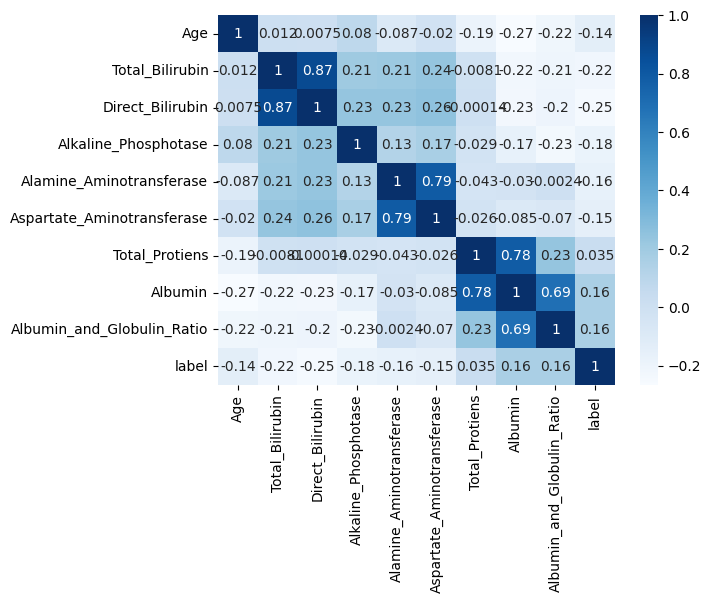

In [10]:
corr = df.corr()
sns.heatmap(corr,cmap='Blues', annot=True)

# Data Preprocessing

In [11]:
df['Gender'].replace(['Male','Female'],[1,0],inplace =True)

X, y= df.drop(['Gender','label'], axis = 1),  df['label']

# Data Imputation 
X['Albumin_and_Globulin_Ratio'].fillna(method='ffill',inplace= True)

## The data is Unbalanced 

<AxesSubplot:xlabel='label', ylabel='count'>

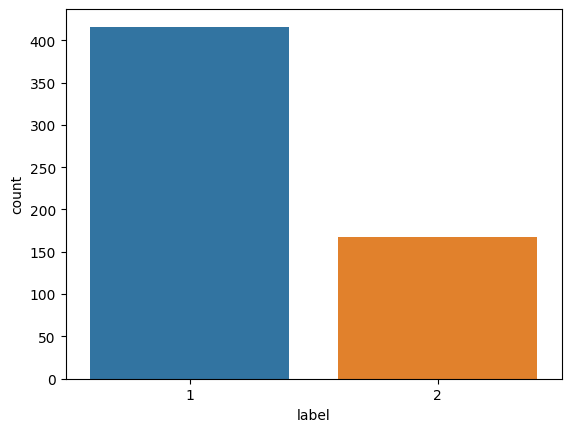

In [12]:
sns.countplot(y)

In [13]:
#Normalizing the datasets

from keras.utils import normalize

X = normalize(X, axis = 1)

In [14]:
df['label'].replace([1,2],[0,1], inplace=True)

X  = X.values #  

y = df['label']

y= y.values.reshape(-1,1)

## Modelling phase 

In [15]:
# importing models to build our model 

from sklearn import ensemble
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics 
from sklearn.model_selection import train_test_split
import pandas as pd 

In [16]:
# Splitting of data 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 42,shuffle=True )

In [17]:
# model definition and fitting 

model = [
 ensemble.RandomForestClassifier(n_estimators=10,random_state=42),
 tree.DecisionTreeClassifier(max_depth=20, random_state= 42),
 SVC(random_state=42)
]

roc_score = []
acc_score = []
for i in model:
    i.fit(x_train,y_train)
    y_pred = i.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    roc = metrics.roc_auc_score(y_test, y_pred)
    acc_score.append(acc)
    roc_score.append(roc)
    result = pd.DataFrame({'accuracy':acc_score, 'roc':roc_score})
result
    
    
    

,accuracy,roc
0,0.717949,0.602874
1,0.709402,0.608046
2,0.743590,0.500000


## Model Evaluation  using the unbalanced dataset  
1. since the data is unbalanced most of the decision will be based of the ROC_AUC_SCORE

In [18]:
# Using Random Forest to fit our unbalanced data 

model_RF = model[0]

y_pred_dtc = model_RF.fit(x_train,y_train).predict(x_test)

In [19]:
# 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_dtc)
print(cm)

[[73 14]
 [19 11]]


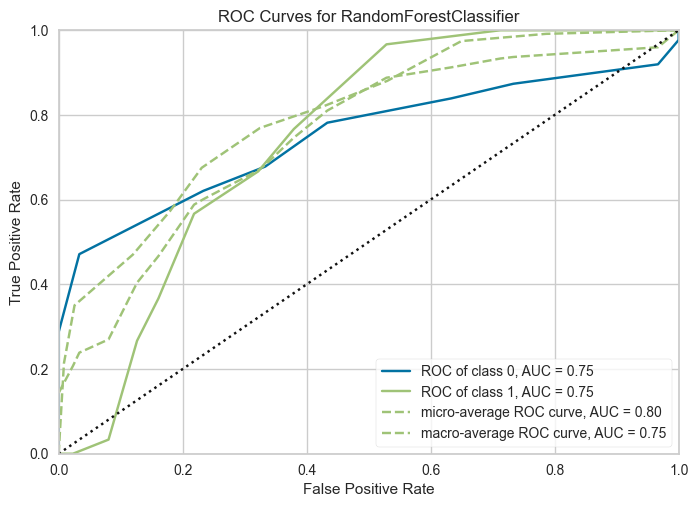

<Figure size 800x400 with 0 Axes>

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [20]:
from yellowbrick.classifier import ROCAUC
roc_auc = ROCAUC (model_RF, classes = [0,1])
roc_auc.fit(x_train, y_train)
roc_auc.score(x_test , y_test)
plt.figure(figsize=(8,4))
roc_auc.show()


In [21]:
model_DT = model[1]

y_pred_dtc = model_DT.fit(x_train,y_train).predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_dtc)
print(cm)

[[71 16]
 [18 12]]


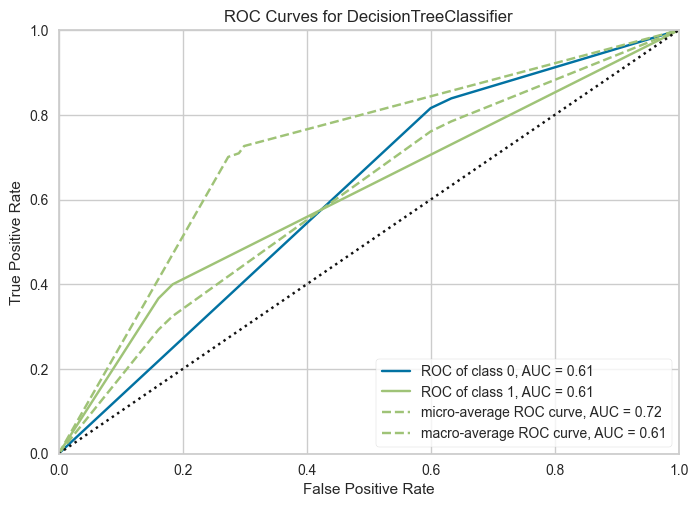

<Figure size 800x400 with 0 Axes>

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [23]:
from yellowbrick.classifier import ROCAUC
roc_auc = ROCAUC (model_DT, classes = [0,1])
roc_auc.fit(x_train, y_train)
roc_auc.score(x_test , y_test)
plt.figure(figsize=(8,4))
roc_auc.show()


In [24]:
model_SV = model[2]

y_pred_dtc = model_SV.fit(x_train,y_train).predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_dtc)
print(cm)

[[87  0]
 [30  0]]


In [26]:
# from yellowbrick.classifier import ROCAUC
# roc_auc = ROCAUC (model_SV, classes = [0,1], binary =True)
# roc_auc.fit(x_train, y_train)
# roc_auc.score(x_test , y_test)
# plt.figure(figsize=(8,4))
# roc_auc.show()


## Balancing the data using upsampling technique 

1. After balancing the data we expect the model performance to increase relatively
2. The Random Forest Classifier model will be our baseline model in this case

In [27]:
from sklearn.utils  import resample


In [28]:
label_one = df[df['label']==1]
label_zero = df[df['label']==0]

In [29]:
print(str(len(label_one))+',' + str(len(label_zero)))


167,416


## Upsampling the data

In [37]:

    
    # using the resampling techinque
df_labelone_resampled = resample( label_one,
    replace = True,
    n_samples = 416,
    random_state = 42 )
    
    # Appending the newly upsampled data
df_upsampled = pd.concat([label_zero, df_labelone_resampled])
print(f'Length of data :',len(df_upsampled))
y_upsampled = df['label']
    
    
    # Checking if data is balanced
if len(label_zero) ==  len( df_labelone_resampled):
     print('\nData is balanced now !')

else:
    
     print('Data is still not balanced, try balancing it ')
        
 

Length of data : 832

Data is balanced now !


## Data Imputation 

In [38]:
# Imputing missing values uing the foward filling method

x_upsampled = df.drop(['label','Gender'], axis =1)
x_upsampled['Albumin_and_Globulin_Ratio'].fillna(method='ffill', inplace = True)

# Reshaping and normalizing 
y_upsampled = y_upsampled.values.reshape(-1,1) 
x_updampled = x_upsampled.values
x_updampled = normalize(x_updampled , axis = 1)

## Fitting the model using the upsampled, normalised, splitted  dataset 

In [39]:

x_train_upsampled, x_test_upsampled, y_train_upsampled, y_test_upsampled = \
train_test_split(x_upsampled,y_upsampled, test_size=0.2, random_state=42, shuffle=False)


model_rf = ensemble.RandomForestClassifier(n_estimators= 20 , random_state=42)
y_pred_upsampled = model_rf.fit(x_train_upsampled, y_train_upsampled).predict(x_test_upsampled)

## Model Evaluation 

### Expectation:
1. It's is expected that the model performance will increase since data is balanced now 

In [40]:
cm = confusion_matrix(y_test_upsampled, y_pred_upsampled)
print(cm)

[[81  5]
 [22  9]]


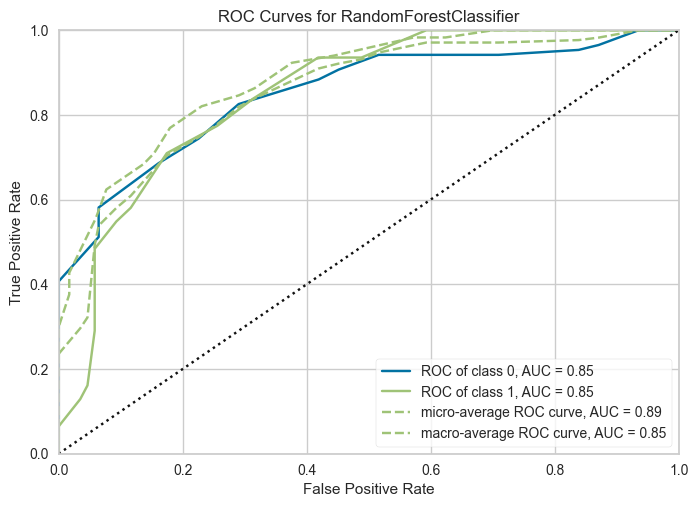

<Figure size 800x400 with 0 Axes>

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [41]:
roc_auc = ROCAUC (model_rf, classes = [0,1])
roc_auc.fit(x_train_upsampled, y_train_upsampled)
roc_auc.score(x_test_upsampled,y_test_upsampled)
plt.figure(figsize=(8,4))
roc_auc.show()


## Conclusion 
1. It is evident that the balancing the data will improve the model performance 